# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data= pd.read_csv('/Users/carrie/IronHack/DAFT_NOV_21_01/module_3/12. Imbalance/paysim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [37]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [38]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

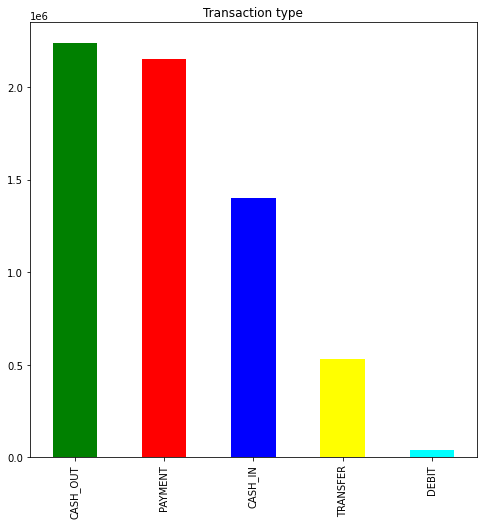

In [39]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8),color=['green','red',  'blue','yellow', 'cyan'])
plt.show()

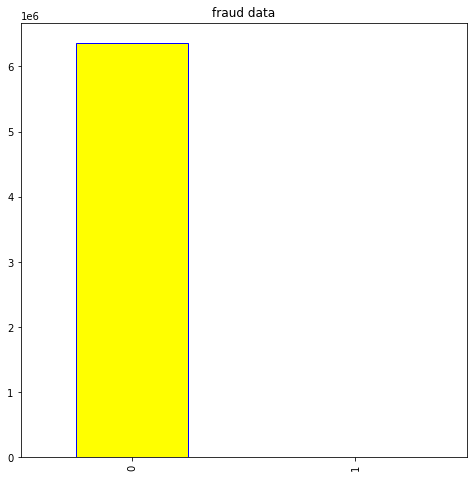

In [40]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8),color=['yellow','yellow'],edgecolor='blue')
plt.show()

In [41]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

/Users/carrie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

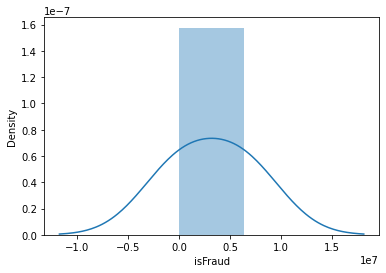

In [42]:
sns.distplot(data.isFraud.value_counts())


In [43]:
# the data is highly imbalanced

### What is the distribution of the outcome? 

In [44]:
# Your response here
#the distribution is right skewed, since the mean is more than 0

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [45]:
# Your code here
# I checked the columns interpretation: Steps - Maps a unit of time in the real world. In this case 1 step is 1 hour of time.
# so it is appropriate I think

In [46]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [47]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [48]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [49]:
data.nameOrig.value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [50]:
data.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [51]:
# too many variantion, drop those 2 cols
data.drop(columns=['nameOrig', 'nameDest'], axis=1, inplace=True) 
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [52]:
from sklearn.preprocessing import LabelEncoder

lable = LabelEncoder()

data_encode = data.copy()

lable.fit(data_encode['type'])
label_name_mapping = dict(zip(lable.classes_, lable.transform(lable.classes_)))
print(label_name_mapping)

data_encode['type']=lable.fit_transform(data_encode['type'])
data_encode

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [53]:
data_encode.dtypes

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [58]:
data_encode.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [60]:
data_encode.duplicated().sum()

543

In [61]:
data_encode = data_encode.drop_duplicates()

### Run a logisitc regression classifier and evaluate its accuracy.

Accuracy score:  0.9991991612805875
Recall score:  0.4331360946745562

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270726
           1       0.92      0.43      0.59      1690

    accuracy                           1.00   1272416
   macro avg       0.96      0.72      0.79   1272416
weighted avg       1.00      1.00      1.00   1272416



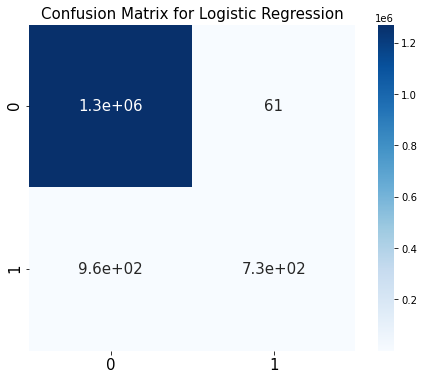

In [62]:
# Your code here
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X= data_encode.drop(columns='isFraud')
y=data_encode['isFraud']

X = StandardScaler().fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))

generate_results(lr, y_pred, 'Logistic Regression')

### Now pick a model of your choice and evaluate its accuracy.

Accuracy score:  0.9991991612805875
Recall score:  0.4331360946745562

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270726
           1       1.00      0.33      0.50      1690

    accuracy                           1.00   1272416
   macro avg       1.00      0.67      0.75   1272416
weighted avg       1.00      1.00      1.00   1272416



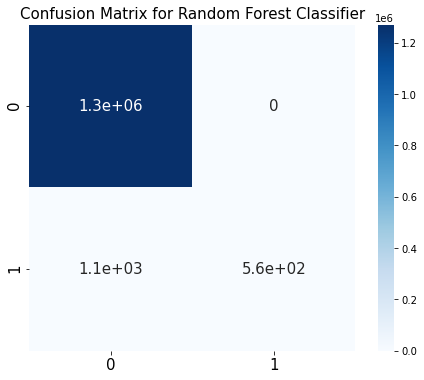

In [153]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc.fit(x_train, y_train)
y_pred2 = rfc.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))

generate_results(rfc, y_pred2, 'Random Forest Classifier')

### Which model worked better and how do you know?

In [2]:
# Your response here
# is better, since for the fraud detection, the recall is the most important, higher recall is better(false negative the lower possible)

### Let's use NearMiss method for undersampling and compare the results with previous

In [149]:
from collections import Counter
from imblearn.under_sampling import NearMiss 

X= data_encode.drop(columns='isFraud')
y=data_encode['isFraud']

nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 8197, 1: 8197})


In [123]:
y_res.value_counts()

0    8197
1    8197
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='step', ylabel='Count'>

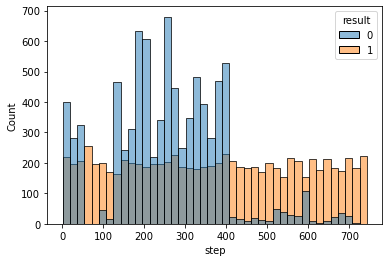

In [145]:
#from collections import Counter
#from matplotlib import pyplot

#X_res['result']=y_res


#sns.histplot(data=X_res, x='step', hue='result')

### And now let's apply SMOTE

In [146]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 6353880, 1: 6353880})


### Apply your model on improved data

In [155]:
y_pred3 = rfc.predict(X_res)

/Users/carrie/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Calculate classification report for imbalanced data to evaluate the models

In [156]:
print('Accuracy score: ', accuracy_score(y_res,y_pred3))
print('Recall score: ', recall_score(y_res,y_pred3))

Accuracy score:  0.9122849823106014
Recall score:  0.9960961327314871


### What is your conclusion?

In [ ]:
# yes, greatly improved the Recall, that's perfect for a Fraud detection